## Create dataset

## Instructions:
create testing folder in home (~/) directory 

download glove embeddings and place "glove.6B" folder in home~/ directory http://nlp.stanford.edu/data/glove.6B.zip

also, increase the speed of your instance (i used 16 CPUs and it took 6 hours to train 1 epoch of 3,000 word sequences)

In [1]:
# !pip install keras
# !pip install tensorflow
# !pip install plotly
# !pip install gensim
# !pip install Word2Vec
# !pip install get_tmpfile
# !pip install gensim.test.utils
# !pip install boto
# !pip install google-compute-engine



     |████████████████████████████████| 7.2MB 29.6MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=1f1f71e14f78ae853a66da4eedd9dcd336369635e2698a1d447cf0642ce21b7d
  Stored in directory: /home/ubuntu/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
     |████████████████████████████████| 24.2MB 37.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 15.5MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.8.4-cp37-none-any.whl size=68201 sha256=f11481b66e4cdd62058ae561e6ec31b0aa22d9e46c67d6bfcf7c0aa57a0c84ba
  Stored in directory: /home/ubuntu/.cache/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open
     |████████████████████████████████| 61kB 12.3MB/s eta 0:00:01


  Created wheel for Word2Vec: filename=word2vec-0.10.2-cp37-cp37m-linux_x86_64.whl size=129831 sha256=0fe7bd28f5f996a2014dc0137f52595f7534cf363856e00f644d1c12bdb453a1
  Stored in directory: /home/ubuntu/.cache/pip/wheels/ef/9f/06/aec42532c9c37e05f936d4d586b15cfdfc9f2ffb62bd7fed1c
Successfully built Word2Vec
ERROR: Could not find a version that satisfies the requirement get_tmpfile (from versions: none)
ERROR: No matching distribution found for get_tmpfile
ERROR: Could not find a version that satisfies the requirement gensim.test.utils (from versions: none)
ERROR: No matching distribution found for gensim.test.utils
     |████████████████████████████████| 51kB 10.1MB/s eta 0:00:01
  Created wheel for google-compute-engine: filename=google_compute_engine-2.8.13-py2.py3-none-any.whl size=84077 sha256=4f02afd5ce930c17486f375e80f7ab6c69288a8d7933ccb9443488a6a4f4aa8a
  Stored in directory: /home/ubuntu/.cache/pip/wheels/7c/74/22/be0712e86562730ee300efbad8c9c0e197fa3e473285590344
Successfully

In [5]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.models import model_from_json
from keras.preprocessing.text import text_to_word_sequence




## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt
# import matplotlib.pyplot

# NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer


# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# from numpy import util


# Word2Vec
from gensim.test.utils import common_texts, get_tmpfile # not working
from gensim.models import Word2Vec

import re
from collections import Counter
import os









## Load final_shuffled.csv

In [10]:
final_csv = pd.read_csv(
    '/s3/bucket/finance/finance_text_classification/data/final_shuffled_25000.csv')

In [11]:
final_csv

## Create '8K_Content' sequences

In [13]:
from nltk.corpus import stopwords 
df = final_csv
stop_words = set(stopwords.words('english'))
month = ['january', 'february', 'march', 'april', 'may', 'june', 'july','august', 'september', 'october','november', 'december']

# remove stop words
stop_words_removed_8K = []

list_of_original_content = list(df["8K_Content"])

for i in range(len(list_of_original_content)):
    list_to_append = []
    split_content = list_of_original_content[i].split()
#     print(split_content)
    for j in range(len(split_content)):
#         print(split_content[j])
        if split_content[j].lower() not in stop_words and split_content[j].lower() not in month:
            list_to_append += [split_content[j]]
#     print(list_to_append)
    list_to_append = " ".join(list_to_append)
    stop_words_removed_8K.append(list_to_append)

        
tokenizer = Tokenizer(num_words=30000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ 123456789', lower=True, split=' ', 
                      char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(stop_words_removed_8K)


seq_len = 300 # set sequence length
sequences = tokenizer.texts_to_sequences(stop_words_removed_8K)
data = pad_sequences(sequences, 
                     maxlen=seq_len, padding='post', 
                     truncating='post') # takes about 5-10 mins

In [14]:
# vocab size
vocabulary_size = max(tokenizer.word_index.values())
print(vocabulary_size)

265833


In [15]:
final_csv['8K_Content_sequences'] = data.tolist()

In [16]:
final_csv

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,8K_Content,Adj Close_GSPC,Adj Close_stock,Close_GSPC,Close_stock,Date,...,Time_of_day,Volume_GSPC,Volume_stock,Year,stock_overnight_movement_tag,8K_Content_cleaned,down,stay,up,8K_Content_sequences
0,0,71271,71549,113043,Item 12. Disclosure of Results of Operati...,1095.42,34.33,1095.42,43.40,2004-07-28,...,out_of_market,1.554300e+09,4699400.0,2004.0,stay,"['item', '12', 'disclosure', 'of', 'results', ...",0,1,0,"[259, 390, 50, 106, 15, 4492, 4, 6646, 144, 28..."
1,1,1256,1257,2091,==============================================...,1143.20,19.78,1143.20,23.86,2004-11-03,...,out_of_market,1.767500e+09,14400.0,2004.0,stay,"['united', 'states', 'securities', 'and', 'exc...",0,1,0,"[252, 255, 8, 26, 282, 1670, 3754, 1, 56, 151,..."
2,2,71040,71317,112681,Check the appropriate box below ...,1372.18,9.10,1372.18,9.10,2012-02-28,...,out_of_market,3.579120e+09,4461800.0,2012.0,down,"['check', 'the', 'appropriate', 'box', 'below'...",1,0,0,"[635, 287, 619, 56, 151, 167, 417, 647, 529, 1..."
3,3,60387,60652,96036,Check the appropriate box below if the Form ...,1055.33,11.56,1055.33,11.56,2010-08-25,...,out_of_market,4.360190e+09,662500.0,2010.0,stay,"['check', 'the', 'appropriate', 'box', 'below'...",0,1,0,"[635, 287, 619, 56, 151, 167, 417, 647, 529, 1..."
4,4,71914,72192,113869,Check the appropriate box below if the Form 8...,1460.91,24.93,1460.91,24.95,2012-10-17,...,out_of_market,3.655320e+09,10950000.0,2012.0,down,"['check', 'the', 'appropriate', 'box', 'below'...",1,0,0,"[635, 287, 619, 56, 151, 167, 417, 647, 529, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,67423,67699,107098,Check the appropriate box below if the Form 8-...,1518.09,27.26,1518.09,28.62,2007-07-25,...,out_of_market,4.283200e+09,3001800.0,2007.0,up,"['check', 'the', 'appropriate', 'box', 'below'...",0,0,1,"[635, 287, 619, 56, 151, 167, 417, 647, 529, 1..."
24996,24996,57045,57308,90826,Check the appropriate box below...,1324.57,21.23,1324.57,23.29,2011-02-08,...,out_of_market,3.881530e+09,117700.0,2011.0,stay,"['check', 'the', 'appropriate', 'box', 'below'...",0,1,0,"[635, 287, 619, 56, 151, 167, 417, 647, 529, 1..."
24997,24997,13267,13350,21302,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,1287.23,21.08,1287.23,21.08,2006-03-03,...,out_of_market,2.152950e+09,290800.0,2006.0,stay,"['united', 'states', 'securities', 'and', 'exc...",0,1,0,"[252, 255, 8, 26, 282, 1670, 85, 29, 1, 56, 15..."
24998,24998,56837,57100,90557,Check the appropriate box below if the ...,1063.41,28.55,1063.41,31.90,2009-10-27,...,out_of_market,5.337380e+09,1657900.0,2009.0,stay,"['check', 'the', 'appropriate', 'box', 'below'...",0,1,0,"[635, 287, 619, 56, 151, 167, 417, 647, 529, 1..."


In [ ]:


X_train = final_csv['8K_Content_sequences'][final_csv['Year'] <= 2008]
X_dev = final_csv['8K_Content_sequences'][(final_csv['Year'] >= 2009) & 
                                       (final_csv['Year'] <= 2010)]
X_test = final_csv['8K_Content_sequences'][final_csv['Year'] >= 2011]

y_train = final_csv[['down','stay','up']][final_csv['Year'] <= 2008]
y_dev = final_csv[['down','stay','up']][(final_csv['Year'] >= 2009) & 
                                       (final_csv['Year'] <= 2010)]
y_test = final_csv[['down','stay','up']][final_csv['Year'] >= 2011]

## Build and Train LSTM Model

In [17]:

model_lstm = Sequential()
model_lstm.add(Embedding(vocabulary_size, 100, input_length=seq_len))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# train network

# model_lstm.fit(np.array(X_train[:5].values.tolist()), np.array(y_train[:5].values.tolist()), validation_split=0.4, epochs=5)

model_lstm.fit(np.array(X_train.values.tolist()), 
               np.array(y_train.values.tolist()), 
               validation_data=(np.array(X_dev.values.tolist()), 
                                np.array(y_dev.values.tolist())), 
               epochs=5)

#TODO: change validation split to validation_data

# takes about 3 mins per epoch using 2/3 of full dataset
# takes about 3 hours per epoch using full dataset (less testing set) 


/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 13316 samples, validate on 5320 samples
Epoch 1/5
13316/13316 [==============================] - 199s 15ms/step - loss: 0.5955 - accuracy: 0.8084 - val_loss: 0.6250 - val_accuracy: 0.7733
Epoch 2/5
13316/13316 [==============================] - 192s 14ms/step - loss: 0.5161 - accuracy: 0.8135 - val_loss: 0.6791 - val_accuracy: 0.7694
Epoch 3/5
13316/13316 [==============================] - 189s 14ms/step - loss: 0.4440 - accuracy: 0.8394 - val_loss: 0.7340 - val_accuracy: 0.7592
Epoch 4/5
13316/13316 [==============================] - 190s 14ms/step - loss: 0.3502 - accuracy: 0.8791 - val_loss: 0.8242 - val_accuracy: 0.7445
Epoch 5/5
13316/13316 [==============================] - 190s 14ms/step - loss: 0.2802 - accuracy: 0.9027 - val_loss: 0.9382 - val_accuracy: 0.7096


In [20]:
# test network

model_lstm.evaluate(np.array(X_test.values.tolist()), 
                    np.array(y_test.values.tolist()))
                    

6364/6364 [==============================] - 10s 2ms/step


[0.8206299770035734, 0.7371150255203247]

In [21]:
# predict
model_lstm_preds = model_lstm.predict(np.array(X_test.values.tolist()))

In [22]:
model_lstm_preds

array([[0.86018974, 0.09221028, 0.04759999],
       [0.24635485, 0.44784164, 0.30580348],
       [0.07811832, 0.6950533 , 0.22682837],
       ...,
       [0.05400217, 0.9042692 , 0.04172861],
       [0.05400216, 0.9042692 , 0.04172861],
       [0.03436233, 0.5295125 , 0.43612516]], dtype=float32)

In [ ]:
# pred_down = []
# pred_stay = []
# pred_up = []

# for i in model_lstm_preds:
#     if np.argmax(i) == 0:
#         pred_down.append(1)
#         pred_stay.append(0)
#         pred_up.append(0)
#     elif np.argmax(i) == 1:
#         pred_down.append(0)
#         pred_stay.append(1)
#         pred_up.append(0)
#     else: 
#         pred_down.append(0)
#         pred_stay.append(0)
#         pred_up.append(1)

In [15]:
predictions = pd.read_csv('lstm_predictions_updated.csv')

# predictions[['x', 'y_down', 'y_stay', 'y_up', 
#              'pred_down', 'pred_stay', 'pred_up']].to_csv(
#     'lstm_predictions_updated.csv')

In [19]:
predictions.head()

,Unnamed: 0,x,y_down,y_stay,y_up,pred_down,pred_stay,pred_up
0,2,Check the appropriate box below ...,1,0,0,0,1,0
1,4,Check the appropriate box below if the Form 8...,1,0,0,0,1,0
2,6,Check the appropriate box below i...,0,1,0,0,1,0
3,7,UNITED STATESSECURITIES AND EXCHANGE COMMISSIO...,0,1,0,0,1,0
4,12,UNITED STATESSECURITIES AND EXCHANGE COMMISSI...,0,0,1,0,1,0


In [34]:
actual = []

for i in predictions[['y_down', 'y_stay', 'y_up']].idxmax(1):
    actual.append(i.split('_')[1])

In [35]:
preds = []

for i in predictions[['pred_down', 'pred_stay', 'pred_up']].idxmax(1):
    preds.append(i.split('_')[1])

In [37]:
predictions['actual'] = actual
predictions['preds'] = preds

In [44]:
from sklearn.metrics import confusion_matrix
y_test = predictions['actual']
y_pred = predictions['preds']
confusion_matrix(y_true, y_pred)

array([[  77,  468,   63],
       [ 237, 4737,  183],
       [  61,  480,   58]])

In [51]:
class_names = y_test.unique()
class_names

array(['down', 'stay', 'up'], dtype=object)

Confusion matrix, without normalization
[[  77  468   63]
 [ 237 4737  183]
 [  61  480   58]]
Normalized confusion matrix
[[0.13 0.77 0.1 ]
 [0.05 0.92 0.04]
 [0.1  0.8  0.1 ]]


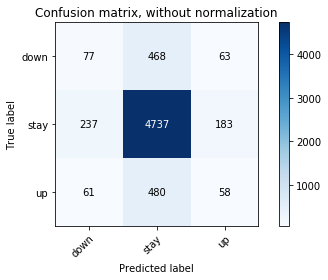

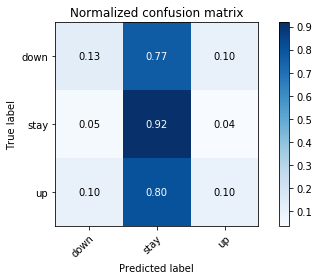

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['down', 'stay', 'up']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
tp = 58
fp = 183 + 63
tn = 4737 + 468 + 237 + 77
fn = 61 + 480

print('accuracy is:', (58 + 4737 + 77) / (77 + 468 + 63 + 237 + 4737 + 183 + 61 + 480 + 58))
print('precision is:',  tp / (tp + fp))
print('recall is:', tp / (tp + fn))

accuracy is: 0.7655562539283469
precision is: 0.19078947368421054
recall is: 0.09682804674457429


In [62]:
# predictions.to_csv('predictions_lstm.csv', index=False)

In [63]:
pd.read_csv('predictions_lstm_updated.csv')

,x,y_down,y_stay,y_up,probs
0,Check the appropriate box below ...,1,0,0,0.108005
1,Check the appropriate box below if the Form 8...,1,0,0,0.092154
2,Check the appropriate box below i...,0,1,0,0.043945
3,UNITED STATESSECURITIES AND EXCHANGE COMMISSIO...,0,1,0,0.038536
4,UNITED STATESSECURITIES AND EXCHANGE COMMISSI...,0,0,1,0.039722
...,...,...,...,...,...
6359,Check the appropriate box below if the For...,0,1,0,0.000709
6360,Check the appropriate box below if the Form ...,0,1,0,0.039715
6361,Check the appropriate box below if the F...,0,1,0,0.039715
6362,Check the appropriate box below...,0,1,0,0.039715


In [49]:
final_csv['8K_Content'][final_csv['Year'] >= 2011]

2                      Check the appropriate box below ...
4         Check the appropriate box below if the Form 8...
6                     Check the appropriate box below i...
7        UNITED STATESSECURITIES AND EXCHANGE COMMISSIO...
12        UNITED STATESSECURITIES AND EXCHANGE COMMISSI...
                               ...                        
24987        Check the appropriate box below if the For...
24993      Check the appropriate box below if the Form ...
24994          Check the appropriate box below if the F...
24996                   Check the appropriate box below...
24999                                    Registrant's t...
Name: 8K_Content, Length: 6364, dtype: object

In [43]:
# reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
# def sequence_to_text(list_of_indices):
#     # Looking up words in dictionary
#     words = [reverse_word_map.get(letter) for letter in list_of_indices]
#     return(words)
# my_texts = list(map(sequence_to_text, X_test))


In [ ]:
# set model # for saving the model and weights to json and h5
model_num = 1

In [ ]:
# predictions to csv
np.savetxt('predictions_lstm_%d_cleaned.csv' %model_num, model_lstm_preds, delimiter=',')
print("Saved predictions to disk: ", 'predictions_lstm_%d_cleaned.csv' %model_num)

In [23]:
# save model

# serialize model to JSON
model_lstm_json = model_lstm.to_json()
with open("model_lstm.json" %model_num, "w") as json_file:
    json_file.write(model_lstm_json)
# serialize weights to HDF5
model_lstm.save_weights("model_lstm.h5" %model_num)
print("Saved model to disk: ", 'model_lstm_%d_cleaned.json and model_lstm_%d_cleaned.h5' %(model_num, model_num))

NameError: name 'model_num' is not defined

In [ ]:
# load model
# note: latest file updated 11/30. 3,000 word sequence.

# load json and create model
json_file = open('model_lstm_%d_cleaned.json' %model_num, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_lstm_%d_cleaned.h5" %model_num)
print("Loaded model from disk: ", 'model_lstm_%d_cleaned.json and model_lstm_%d_cleaned.h5' %(model_num, model_num))

In [266]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(np.array(X_test.values.tolist()), 
                              np.array(y_test.values.tolist()), verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 53.18%
